In [1]:
import pandas as pd
import numpy as np

from scipy.stats import skewnorm
from scipy.stats import norm
import scipy.stats as stats

import matplotlib.pyplot as plt

import random

from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [2]:
df = pd.read_csv('/content/gdrive/Shared drives/Data Science/01. Colab Notebooks/Purrvaja/Flows/Student Flows Forecasting/Simulations/confidence_intervals.csv')

### Setting Up MLFlow

In [15]:
!pip install mlflow

In [16]:
def authenticate_databricks():
  tracking_uri = f"databricks://https://community.cloud.databricks.com/"
  username = "purrvaja.jayakumar@holoniq.com"
  password = "dataAws.23"
  mlflow.login(tracking_uri, username, password)

authenticate_databricks()

TypeError: login() takes from 0 to 2 positional arguments but 3 were given

In [17]:
import mlflow

In [14]:
import mlflow
mlflow.set_tracking_uri("databricks")
mlflow.set_experiment("/Users/purrvaja.jayakumar@holoniq.com/Monte Carlo Experimenting")

InvalidConfigurationError: You haven't configured the CLI yet! Please configure by entering `/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py configure`

In [4]:
import mlflow
from mlflow.models import infer_signature

ModuleNotFoundError: No module named 'mlflow'

### Push distribution (Normal Dist) - Source Country

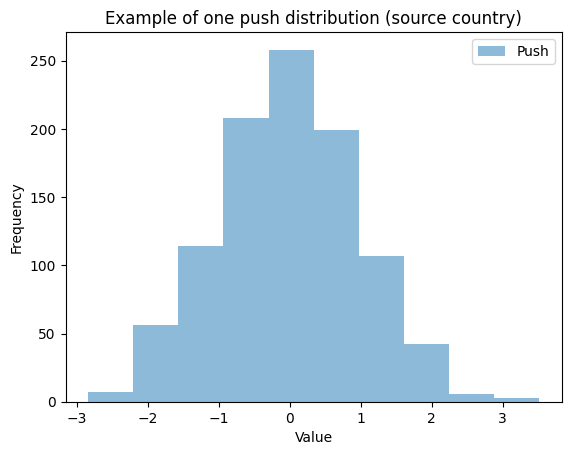

In [3]:
push_numbers = skewnorm.rvs(a=0, size= 1000)


# Plot the distributions
plt.hist(push_numbers, label="Push", alpha=0.5)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Example of one push distribution (source country)")
plt.legend()
plt.show()

In [ ]:
# Push Distribution - standardized normal distribution

numValues = 100000
maxValue = 1
skewness = 0   #No skew

push_proto = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)  #Skewnorm function

push_proto = push_proto - min(push_proto)      #Shift the set so the minimum value is equal to zero.
push_proto = push_proto / max(push_proto)      #Standadize all the vlues between 0 and 1.
push_proto = push_proto * maxValue         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(push_proto,100,density=True, alpha=1)
plt.show()


## Creating the pull and disruption distributions

### Gamma Distribution

Chose a gamma distribution to generate the pull, disruption distributions since it allows to set kurtosis, and spread (this distribution is by default skewed to the right).

Experimented with the kurtosis and scale before settling on the below.

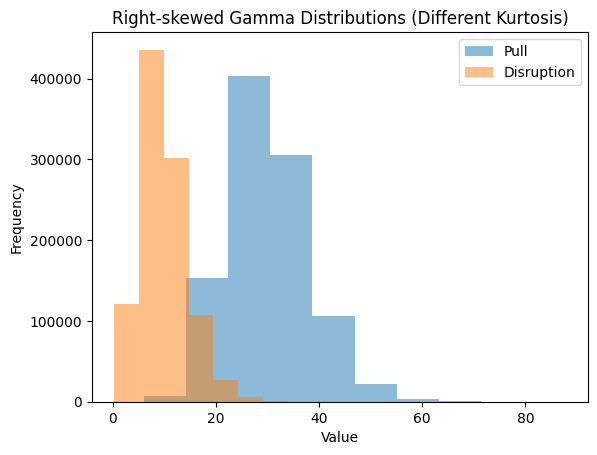

In [10]:
# Define parameters
pull_alpha = 15  # Higher alpha reduces skew and kurtosis (pull)
disruption_alpha = 5 # Lower alpha increases skew and kurtosis (disruption)

beta = 2

# Generate sample distributions
pull_data = stats.gamma.rvs(pull_alpha, scale=beta, size=1000000)

disruption_data = stats.gamma.rvs(disruption_alpha, scale=beta, size=1000000)


# Plot the distributions
plt.hist(pull_data, label="Pull", alpha=0.5)
plt.hist(disruption_data, label="Disruption", alpha=0.5)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Right-skewed Gamma Distributions (Different Kurtosis)")
plt.legend()
plt.show()


Normalizing the Gamma distributions

Decided to normalize the distributions since we are using multiple distributions across.


(pull, disruption - gamma, push - normal)

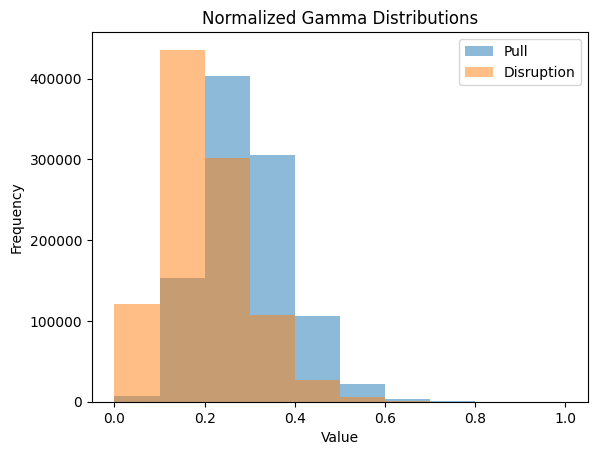

In [11]:

# Normalize the datasets
# the shape (skew) of the distribution has to remain the same

pull_normalized = ((pull_data - np.min(pull_data))/ (np.max(pull_data) - np.min(pull_data)))
disruption_normalized = ((disruption_data - np.min(disruption_data))/ (np.max(disruption_data) - np.min(disruption_data)))


# Plot the distributions
plt.hist(pull_normalized, label="Pull", alpha=0.5)
plt.hist(disruption_normalized, label="Disruption", alpha=0.5)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Normalized Gamma Distributions")
plt.legend()
plt.show()

Plotting with the PDFs

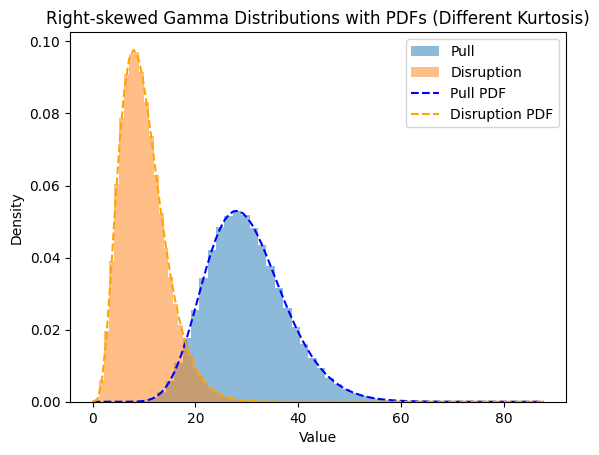

In [12]:


# Plot the histograms
plt.hist(pull_data, bins=50, label="Pull", alpha=0.5, density=True)
plt.hist(disruption_data, bins=50, label="Disruption", alpha=0.5, density=True)

# Plot the probability density functions (PDFs)
x_values = np.linspace(0, max(np.max(pull_data), np.max(disruption_data)), 100)
pull_pdf = stats.gamma.pdf(x_values, pull_alpha, scale=beta)
disruption_pdf = stats.gamma.pdf(x_values, disruption_alpha, scale=beta)
plt.plot(x_values, pull_pdf, color='blue', linestyle='--', label='Pull PDF')
plt.plot(x_values, disruption_pdf, color='orange', linestyle='--', label='Disruption PDF')

plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Right-skewed Gamma Distributions with PDFs (Different Kurtosis)")
plt.legend()
plt.show()


## SkewNorm Distribution

Since Gamma distribution only allows for right skewed distributions, trying the skewnorm dist


Compared to the gamma dist, the control over the kurtosis is limited


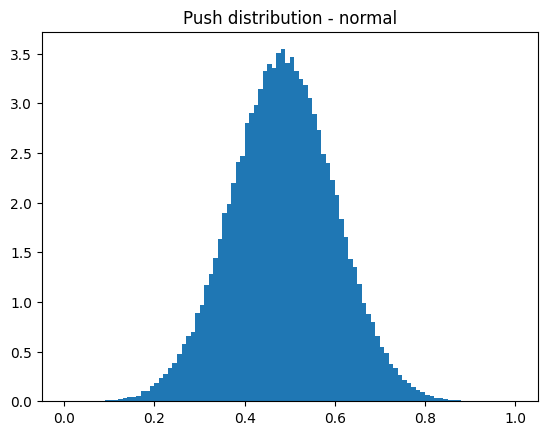

In [93]:
# Push Distribution Prototype

numValues = 100000
maxValue = 1
skewness = 0   #No skew

push_proto = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)  #Skewnorm function

push_proto = push_proto - min(push_proto)      #Shift the set so the minimum value is equal to zero.
push_proto = push_proto / max(push_proto)      #Standadize all the vlues between 0 and 1.
push_proto = push_proto * maxValue         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(push_proto,100,density=True, alpha=1)
plt.title('Push distribution - normal')
plt.show()

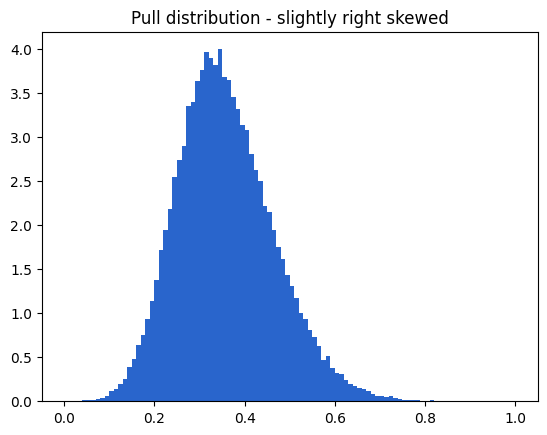

In [92]:
# Pull Distribution Prototype

numValues = 100000
maxValue = 1
skewness = 2   #Negative values are left skewed, positive values are right skewed.

pull_alternate = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)  #Skewnorm function

pull_alternate = pull_alternate - min(pull_alternate)      #Shift the set so the minimum value is equal to zero.
pull_alternate = pull_alternate / max(pull_alternate)      #Standadize all the vlues between 0 and 1.
pull_alternate = pull_alternate * maxValue         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(pull_alternate,100,density=True, color = '#2965CC', alpha=1)
plt.title('Pull distribution - slightly right skewed')
plt.show()

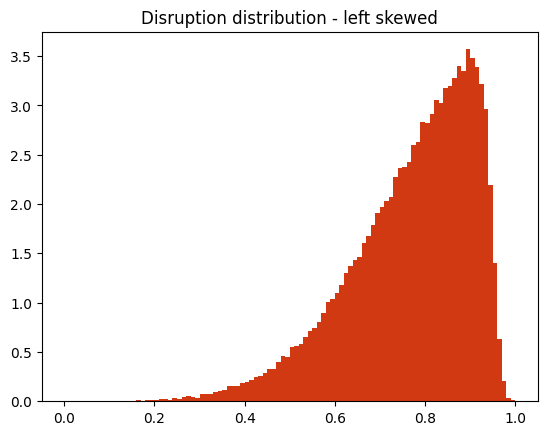

In [91]:
# Disruption Distribution Prototype

numValues = 100000
maxValue = 1
skewness = -15  #Negative values are left skewed, positive values are right skewed.

disrupt_alternate = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)  #Skewnorm function

disrupt_alternate = disrupt_alternate - min(disrupt_alternate)      #Shift the set so the minimum value is equal to zero.
disrupt_alternate = disrupt_alternate / max(disrupt_alternate)      #Standadize all the vlues between 0 and 1.
disrupt_alternate = disrupt_alternate * maxValue         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(disrupt_alternate,100,density=True, color = '#D13913', alpha=1)
plt.title('Disruption distribution - left skewed')
plt.show()


### Stats for the above distributions

In [13]:


print("Pull distribution - Median: ", np.median(pull_alternate))
print("Pull distribution - Mean: ", np.mean(pull_alternate))

print("Pull distribution - Max: ", np.max(pull_alternate))
print("Pull distribution - Min: ", np.min(pull_alternate))



Pull distribution - Median:  0.6408608743853991
Pull distribution - Mean:  0.6313821251686392
Pull distribution - Max:  1.0
Pull distribution - Min:  0.0


In [ ]:
print("Pull normalized distribution - Median: ", np.median(pull_alternate))
print("Pull normalized distribution - Mean: ", np.mean(pull_alternate))

print("Pull normalized distribution - Max: ", np.max(pull_alternate))
print("Pull normalized distribution - Min: ", np.min(pull_alternate))


Pull normalized distribution - Median:  0.6984885527041472
Pull normalized distribution - Mean:  0.6840490970797274
Pull normalized distribution - Max:  1.0
Pull normalized distribution - Min:  0.0


In [84]:

print("Disruption distribution - Median: ", np.median(disrupt_alternate))
print("Disruption distribution - Mean: ", np.mean(disrupt_alternate))

print("Disruption distribution - Max: ", np.max(disrupt_alternate))
print("Disruption distribution - Min: ", np.min(disrupt_alternate))

Disruption distribution - Median:  0.8146770257886078
Disruption distribution - Mean:  0.7891623037804592
Disruption distribution - Max:  1.0
Disruption distribution - Min:  0.0


In [ ]:
print("Disruption normalized distribution - Median: ", np.median(disrupt_alternate))
print("Disruption normalized distribution - Mean: ", np.mean(disrupt_alternate))

print("Disruption normalized distribution - Max: ", np.max(disrupt_alternate))
print("Disruption normalized distribution - Min: ", np.min(disrupt_alternate))

Disruption normalized distribution - Median:  0.7943195139573977
Disruption normalized distribution - Mean:  0.7693297823869115
Disruption normalized distribution - Max:  1.0
Disruption normalized distribution - Min:  0.0


In [7]:
num_countries = len(df['Country'])
num_countries

221

In [ ]:
# for each country there has to be a distribution (push)
# each distribution (country) will have a bunch of numbers
# from that we pick out one number as the push number for that particular country



In [48]:
np.std([1.7, 1.8, 2,1])

0.3766629793329841

In [87]:


def monte_carlo_simulation(lower_confidence_intervals, upper_confidence_intervals,middle_confidence_intervals, skews, pull_distribution, disruption_distribution, num_simulations):
    global_distributions = []


    for _ in range(num_simulations):
        country_sums = []

        # Pick a pull number and disruption number for each simulation
        pull_number = np.random.choice(pull_distribution)
        disruption_number = np.random.choice(disruption_distribution)

        for i in range(num_countries):

            # pick a push number for each country (from a normal distribution)
            push_number = np.random.choice(push_proto)

            # Calculate the weighted number
            #weighted_number = (0.33 * push_number + 0.33 * pull_number + 0.33 * disruption_number)
            weighted_number = ((0.50 * push_number) + (0.50 * pull_number) **  disruption_number)


            #==============================================================================================================================================#

            # Using the weighted_number to pick out a point from the country's distribution

            # Creating the country's distribution based on it's lower, upper, middle values
            lower = lower_confidence_intervals[i]
            upper = upper_confidence_intervals[i]
            middle = middle_confidence_intervals[i]
            skew = skews[i]


            # instead of using the triangular distribution, using a normal distribution
            if skew == "Mid":
              a=0
            elif skew == "Lower":
              a=2
            elif skew == "Upper":
              a=-2

            # generate distributions for the countrys, taking skew into account as well
            country_dist = skewnorm(a,loc=middle,scale = np.std([lower, middle, upper]))

            picked_number = country_dist.ppf(weighted_number)


            country_sums.append(picked_number)

        # Sum the volumes from all countries
        global_distributions.append(sum(country_sums))


    return global_distributions



In [88]:
#1000 iterations (test)

# Perform Monte Carlo simulation
global_distribution = monte_carlo_simulation(df['Lower'], df['Upper'], df['Middle'], df['Skew'], pull_alternate, disrupt_alternate, num_simulations=100)

# Calculate global confidence intervals
lower_global_ci = np.percentile(global_distribution, 2.5)
upper_global_ci = np.percentile(global_distribution, 97.5)
median_global_volume = np.median(global_distribution)

print("Lower global confidence interval:", lower_global_ci)
print("Median global volume:", median_global_volume)
print("Upper global confidence interval:", upper_global_ci)



Lower global confidence interval: 1286049.4170939203
Median global volume: 1385490.3228049865
Upper global confidence interval: 1541139.5555299956


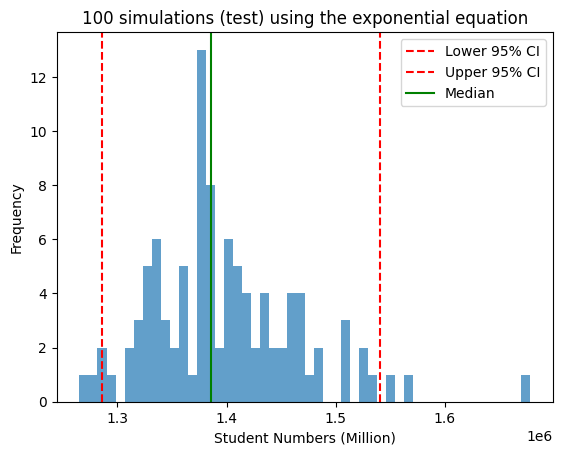

In [90]:
# Plotting the above distribution

plt.hist(global_distribution, bins=50, alpha=0.7)
plt.axvline(x=lower_global_ci, color='red', linestyle='--', label='Lower 95% CI')
plt.axvline(x=upper_global_ci, color='red', linestyle='--', label='Upper 95% CI')
plt.axvline(x=median_global_volume, color='green', linestyle='-', label='Median')
plt.title('100 simulations (test) using the exponential equation')
plt.xlabel('Student Numbers (Million)')
plt.ylabel('Frequency')
plt.legend()
plt.show()



Mockup of placeholder curve

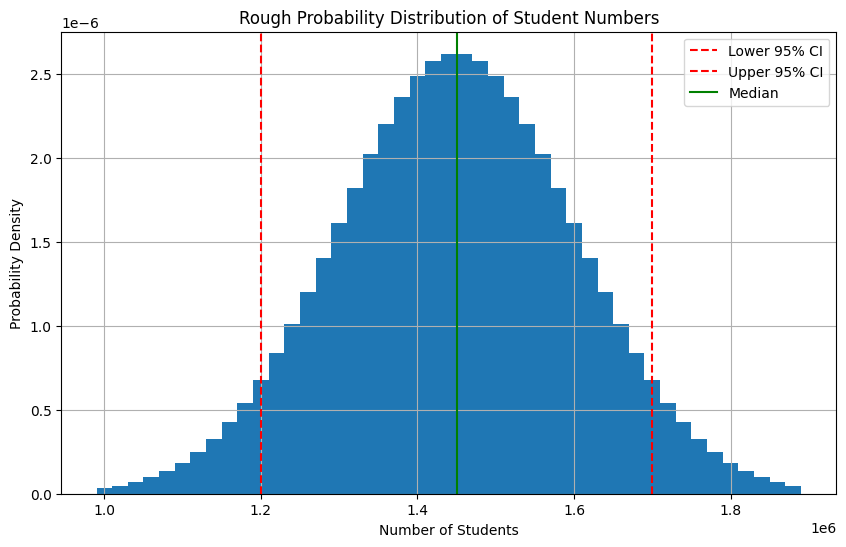

In [40]:


# Mean values for each scenario
lower_CO = 1200000
likely = 1450000
upper_CO = 1700000

# Standard deviation (adjust as needed)
std_dev = (upper_CO - lower_CO) / 3.29  # Approximately 1/3.29th of the range

# Generate data for the normal distribution
x = np.arange(lower_CO - 200000, upper_CO + 200000, 20000)  # Bins for every 20,000 students
y = 1 / (std_dev * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - likely) / std_dev) ** 2)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x, y, width=20000) #, align='center')

plt.axvline(x=lower_CO, color='red', linestyle='--', label='Lower 95% CI')
plt.axvline(x=upper_CO, color='red', linestyle='--', label='Upper 95% CI')
plt.axvline(x=likely, color='green', linestyle='-', label='Median')


plt.xlabel('Number of Students')
plt.ylabel('Probability Density')
plt.title('Rough Probability Distribution of Student Numbers')
plt.grid(True)
plt.legend()
plt.show()


In [33]:
len(x)

45

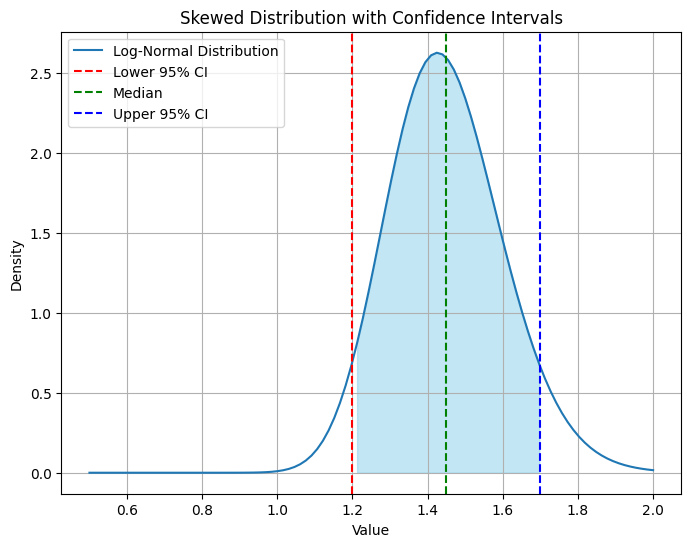

In [41]:

from scipy.stats import lognorm

# Set parameters
lower_ci = 1.2  # Lower confidence interval
median = 1.45   # Median
upper_ci = 1.7  # Upper confidence interval

# Calculate parameters for log-normal distribution
sigma = (np.log(upper_ci) - np.log(lower_ci)) / (2 * 1.645)  # 1.645 is the z-score for 90% confidence interval
mu = np.log(median) - 0.5 * sigma**2

# Generate data
x = np.linspace(0.5, 2, 100)
pdf = lognorm.pdf(x, sigma, scale=np.exp(mu))

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label='Log-Normal Distribution')
plt.fill_between(x, pdf, where=(x >= lower_ci) & (x <= upper_ci), color='skyblue', alpha=0.5)
plt.axvline(lower_ci, color='r', linestyle='--', label='Lower 95% CI')
plt.axvline(median, color='g', linestyle='--', label='Median')
plt.axvline(upper_ci, color='b', linestyle='--', label='Upper 95% CI')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Skewed Distribution with Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
skewnorm.rvs(a=0, size= 1000)

array([ 1.78654335e+00,  1.01685387e+00, -1.85244623e+00,  5.37715954e-01,
       -5.53379857e-01, -1.15870089e+00, -1.68981592e-02,  2.17191333e+00,
        4.69536078e-01,  1.77227876e-01, -1.98144340e-02, -1.00328907e+00,
        4.31397061e-01,  9.62520501e-01,  2.82854649e-01, -1.23221670e+00,
        1.31097147e+00, -1.43135179e-01, -7.87911314e-01, -1.03905811e+00,
        5.63447964e-01, -1.58490902e+00,  1.67005935e+00,  3.10869682e-01,
       -2.30470914e+00, -1.19470517e+00,  1.10224998e+00,  1.11104901e+00,
        8.80817967e-01, -2.78583237e-02, -3.86323504e-01,  4.72405148e-01,
        1.24755769e-03, -8.07267919e-01, -1.82929588e+00, -1.96980021e+00,
       -1.62565591e+00, -5.24295755e-01,  9.99223714e-01, -1.95886258e-01,
        2.47988077e+00, -8.16808131e-01,  2.71759482e-01,  1.41452049e+00,
       -1.74248023e+00,  7.65783967e-01,  7.59466743e-01,  2.55776790e-01,
       -3.44502885e-01, -3.82068828e-01,  7.53344992e-01,  3.95773648e-01,
        6.31098214e-01,  

In [45]:
np.random.normal(loc=1.2, scale=0.5, size=100)

array([ 1.51176317,  0.9632991 ,  1.87859997,  0.66303411,  1.54195682,
        0.60022246,  1.54124191,  0.15095628,  0.87172856,  1.19383044,
        1.11870883,  0.84327605,  1.62941005,  1.36925019,  1.38744503,
        1.05087091,  0.64616416,  1.35031848,  0.73950999,  0.62728797,
        1.45288812,  1.51745804,  0.57673453,  0.44031479,  1.31178555,
        1.75628219,  1.48851138,  1.13157319,  1.58723475,  0.41711519,
        2.02325897,  1.12642082,  1.09497951,  1.05491573,  1.63942109,
        1.13953588,  1.35489629,  1.74285649,  1.007477  ,  1.1500197 ,
        0.50249518,  0.80787187,  1.3243728 ,  1.10438463,  1.56937264,
        0.74962843,  1.81940967,  1.44876935,  1.33685543,  0.77247523,
        1.24785462,  0.19641967,  1.35904907,  1.27497362,  1.97419918,
        0.47628265,  1.86912146,  1.25329168,  1.78588322,  0.56924318,
        1.81336292,  1.77714045,  1.60919876,  1.13563269,  1.93743275,
        1.31239138,  0.89158549,  1.05606236,  0.14701944,  0.12

In [57]:
mu, sigma = 1.4, 0.19 # mean and standard deviation
data = np.random.normal(mu, sigma, 1000)

lower_ci = np.percentile(data, 2.5)
upper_ci = np.percentile(data, 97.5)
median = np.median(data)

print(lower_ci)
print(upper_ci)
print(median)

1.0079898813650372
1.7806206904270783
1.3948562571779277


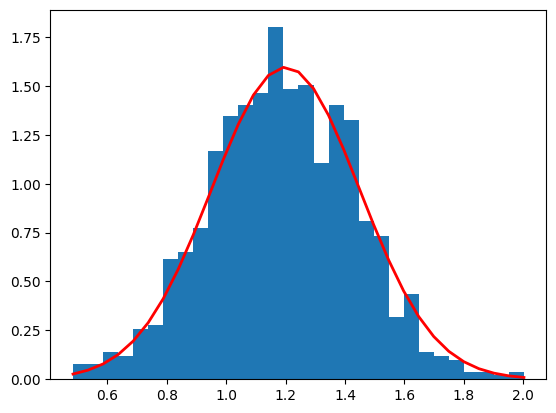

In [58]:
mu, sigma = 1.2, 0.25 # mean and standard deviation
data = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(data, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()


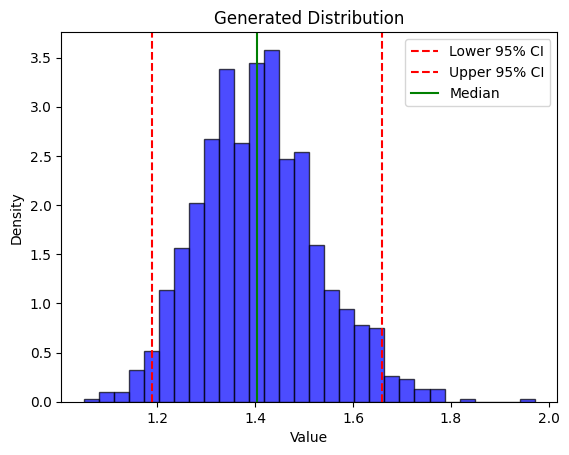

In [96]:

from scipy.stats import lognorm

# Percentiles
percentiles = [1.2, 1.4, 1.7]  # 2.5th, 50th (median), 97.5th

# Calculate parameters for log-normal distribution
mu = np.log(percentiles[1])
sigma = (np.log(percentiles[2]) - np.log(percentiles[0])) / (2 * 1.96)  # Using 1.96 as z-score for 95% CI

# Generate random samples from log-normal distribution
np.random.seed(42)  # for reproducibility
samples = lognorm.rvs(s=sigma, scale=np.exp(mu), size=1000)

# Confidence interval values for the distribution
lower_ci = np.percentile(samples, 2.5)
upper_ci = np.percentile(samples, 97.5)
median = np.median(samples)


# Plot histogram of generated samples
plt.hist(samples, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')

plt.axvline(x=lower_ci, color='red', linestyle='--', label='Lower 95% CI')
plt.axvline(x=upper_ci, color='red', linestyle='--', label='Upper 95% CI')
plt.axvline(x=median, color='green', linestyle='-', label='Median')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Generated Distribution')
plt.legend()
plt.show()

#rearrange and send


In [110]:
samples

array([1.46317269, 1.3829058 , 1.48293286, 1.60287541, 1.37117335,
       1.37117535, 1.61089708, 1.49879536, 1.34280093, 1.46914519,
       1.34352376, 1.34324779, 1.43042484, 1.18112824, 1.20106279,
       1.33177266, 1.27951154, 1.43964174, 1.29148264, 1.2348923 ,
       1.59472391, 1.37219434, 1.40842544, 1.23352758, 1.33389308,
       1.41386646, 1.26389995, 1.44752386, 1.32724218, 1.36418087,
       1.32711624, 1.6504601 , 1.39832202, 1.27441934, 1.50615257,
       1.25607993, 1.42622422, 1.17626975, 1.24415667, 1.42470403,
       1.49494252, 1.42148052, 1.38568756, 1.36304074, 1.22764784,
       1.3132584 , 1.34385555, 1.53787487, 1.44340371, 1.1970013 ,
       1.44090057, 1.35290784, 1.31827647, 1.47819532, 1.53430945,
       1.52077484, 1.29940259, 1.36205904, 1.44182004, 1.52676799,
       1.34164411, 1.37709436, 1.26892518, 1.25883261, 1.50481234,
       1.57929611, 1.39107088, 1.53056951, 1.44571637, 1.32200686,
       1.44568548, 1.60501412, 1.3955505 , 1.60881308, 1.10926

In [98]:
lower_ci

1.188681968920446

In [99]:
upper_ci

1.6590650430502716

In [100]:
median

1.4031508196689115

In [107]:
#creating a triangular distribution for the country based on stats
triang_dist = stats.triang(c=(median - 1.0) / (2.0 - 1.0), loc=1.0, scale=2.0 - 1.0)

In [108]:
triang_data = triang_dist.rvs(size=1000)


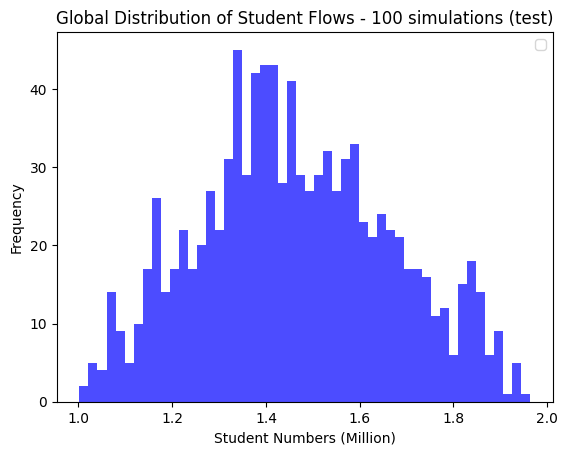

In [109]:
plt.hist(triang_data, bins=50, color='blue', alpha=0.7)
"""
plt.axvline(x=lower_global_ci, color='red', linestyle='--', label='Lower 95% CI')
plt.axvline(x=upper_global_ci, color='red', linestyle='--', label='Upper 95% CI')
plt.axvline(x=median_global_volume, color='green', linestyle='-', label='Median')

"""
plt.title('Global Distribution of Student Flows - 100 simulations (test)')
plt.xlabel('Student Numbers (Million)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Connect

In [3]:
!git clone https://github.com/pj-hiq/Monte-Carlo-Experimentation.git

Cloning into 'Monte-Carlo-Experimentation'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (9/9), 434.72 KiB | 4.26 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [4]:
!git add .

fatal: not a git repository (or any of the parent directories): .git
